# MTH 4320/5320 Python Quiz

## Problem 1


(a) Write a function that takes one input, which can be an integer or a string, checks if the input integer or string is a palindrome, prints a message stating the datetype and whether or not it is a palindrome, returns True if it is a palindrome, and returns False if not.

If a different datatype is input to the function, it should print a descriptive failure message, but it should **not** return anything.

In [ ]:
def is_palindrome(input, verbose = True):
    
    input_type = type(input)
    
    if verbose: print('The input is of type', input_type)

    if input_type is not int and input_type is not str:
        print('is_palindrome failed: the inputmust be a string or integer')

    else:
        if input_type is int:
            input = str(input)

        if input == input[::-1]:
            if verbose: print(input, 'is a palindrome')
            return True

        else:
            if verbose: print(input, 'is not a palindrome')
            return False

(b) Run it for some examples of strings and integers that are and are not palindromes and examples of other datatypes to demonstrate it works.

We will run it for

* 2 integers that are palindromes
* 2 integers that are not palindromes
* 2 strings that are palindromes
* 2 strings that are not palindromes
* 2 non-integer, non-string inputs to demonstrate failure behavior

In [ ]:
int_palindrome = [1991, 3289823]
int_not_palindrome = [43, 412]

str_palindrome = ['deified', 'racecar']
str_not_palindrome = ['wtf', 'neural networks']

not_int_not_string = [[1, 9, 9, 1], 58.303]

test_cases = int_palindrome + int_not_palindrome
test_cases += str_palindrome + str_not_palindrome
test_cases += not_int_not_string

for x in test_cases:
    print(is_palindrome(x), '\n')

The input is of type <class 'int'>
1991 is a palindrome
True 

The input is of type <class 'int'>
3289823 is a palindrome
True 

The input is of type <class 'int'>
43 is not a palindrome
False 

The input is of type <class 'int'>
412 is not a palindrome
False 

The input is of type <class 'str'>
deified is a palindrome
True 

The input is of type <class 'str'>
racecar is a palindrome
True 

The input is of type <class 'str'>
wtf is not a palindrome
False 

The input is of type <class 'str'>
neural networks is not a palindrome
False 

The input is of type <class 'list'>
is_palindrome failed: the inputmust be a string or integer
None 

The input is of type <class 'float'>
is_palindrome failed: the inputmust be a string or integer
None 



(c) Use your function in a loop to find all palindromes in the Academic Advising text transcript from the [Michigan Corpus of Academic Spoken English](https://quod.lib.umich.edu/cgi/c/corpus/corpus?c=micase;cc=micase;view=transcript;id=ADV700JU047).

(d) Write some code to construct a list of the unique palindromes in the text.

First, let's extract the text from the URL and clean it up.

In [ ]:
import re

from urllib.request import urlopen
from bs4 import BeautifulSoup

# open URL
url = 'https://quod.lib.umich.edu/cgi/c/corpus/corpus?c=micase;cc=micase;view=transcript;id=ADV700JU047'
html = urlopen(url).read()

# create an html parser
soup = BeautifulSoup(html, features = 'html.parser')

# get text
text = soup.get_text()

# remove symbols
for char in '()/<>:[].!?-\'':
    text = text.replace(char, ' ')

# make text all lowercase
text = text.lower()

In [ ]:
# split text into words
words = text.split()

# create a list to store palindromes
palindromes = []

# loop over the words
for word in words:
    if word not in palindromes and len(word) > 1:
        if is_palindrome(word, verbose = False):
            palindromes.append(word)

print(palindromes)

['xx', 'mhm', 'mm', 'stats', 'did', 'll', 'level', 'nitin', 'non', 'yay', 'ss', 'refer', '11', 'wow', 'sees', 'huh', 'ele']


## Problem 2

(a) Write a function that uses gradient descent that attempts to minimize an input function of two variables, but instead of just one starting point, create a grid of starting points evenly spaced within a region $[-c, c]\times [-c, c]$ for user-input $c$, and a number of grid points $b^2$ for user-input $b$.

The function should run multiple instances of gradient descent methods, one starting at each of the gridpoints, and return the coordinates of the best minimum that was found.

Let's bring in the gradient descent code from class.

In [ ]:
import numpy as np

# estimate the gradient
def computeGradient(f, x, h):
    n = len(x)
    gradient = np.zeros(n)
    
    for counter in range(n):
        xUp = x.copy()
        xUp[counter] += h
        gradient[counter] = (f(xUp) - f(x))/h
            
    return gradient

# run gradient descent and output the coordinates of the estimated critical point
def gradientDescent(f, x0, alpha, h, tolerance, maxIterations, verbose = True):
    # set x equal to the initial guess
    x = x0

    # take up to maxIterations number of steps
    for counter in range(maxIterations):
        # update the gradient
        gradient = computeGradient(f, x, h)
        
        # stop if the norm of the gradient is near 0 (success)
        if np.linalg.norm(gradient) < tolerance:
            if verbose: print('Gradient descent took', counter, 'iterations to converge')
            if verbose: print('The norm of the gradient is', np.linalg.norm(gradient))
            
            # return the approximate critical point x
            return x
        
        # print a message if we do not converge (failure)
        elif counter == maxIterations-1:
            if verbose: print("Gradient descent failed")
            if verbose: print('The gradient is', gradient)
            
            # return x, sometimes it is still pretty good
            return x
        
        # take a step in the opposite direction as the gradient
        x -= alpha*gradient

Now, we solve (a)...

In [ ]:
def gridGradientDescent(c, b, f, alpha, h, tolerance, maxIterations):
    # create grid intersection points
    x_space = np.linspace(-1 * c, c, b)
    y_space = np.linspace(-1 * c, c, b)

    # initialize the best input and output (minimum)
    best_output = np.Inf
    best_input = 0

    # initialize 
    converged_inputs = []
    converged_outputs = []

    # loop over x values of grid intersections
    for x in x_space:
        inputs = []
        outputs = []

        # loop over y values of grid intersections
        for y in y_space:

            # run gradient descent from grid intersection to get (x,y) positions
            # gradient descent converged to
            converged_input = gradientDescent(f, [x, y], alpha, h, tolerance, maxIterations, False)
            inputs.append(converged_input)

            # compute the output at the (x,y) gradient descent converged to
            converged_output = f(converged_input)
            outputs.append(converged_output)

            # if the current minimum is better than previous ones, save it
            if converged_output < best_output:
                best_input = converged_input
                best_output = converged_output
                
        converged_inputs.append(inputs)
        converged_outputs.append(outputs)

    # return the best input, best minimum, and all minima
    return best_input, best_output, converged_outputs

(b) Create a Python function for the mathematical function

$$f(x,y)=3(1-x)^2e^{-x^2-(y+1)^2}-10\left(\frac{x}{5}-x^3-y^5\right)e^{-x^2-y^2}-\frac{1}{3}e^{-(x+1)^2-y^2}$$

In [ ]:
def f(input):
    x = input[0]
    y = input[1]

    term1 = 3 * (1 - x)**2 * np.exp(-x**2 - (y + 1)**2)
    term2 = 10 * (x/5 - x**3 - y**5) * np.exp(-x**2 - y**2)
    term3 = (1/3) * np.exp(-(x + 1)**2 - y**2)

    return term1 - term2 - term3

(c) Use your gradient descent function in $[-5,5]\times[-5,5]$ for a range of $b$ values. For each, plot a heat map of the function value gradient descent converges to at each grid point.

[*Hint.* Consider the `matplotlib` library.]

b is 3
The converged input is [0.29203318 0.31461682]
The best minimum is -0.0646485150802468 

b is 5
The converged input is [ 0.22169132 -1.63150822]
The best minimum is -6.550350615825662 

b is 10
The converged input is [ 0.22264357 -1.63117796]
The best minimum is -6.550489138936348 

b is 20
The converged input is [ 0.22267123 -1.63116594]
The best minimum is -6.550493234848103 



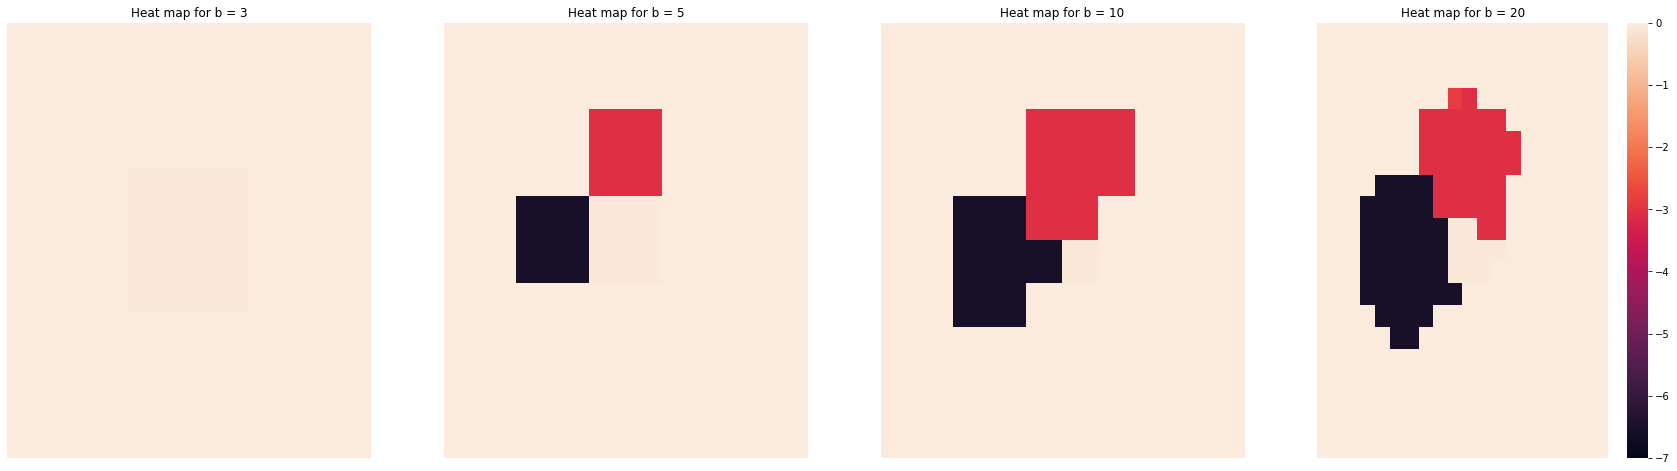

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# range of b values to use
b_list = [3, 5, 10, 20]

# use [-5, 5] x [-5, 5]
c = 5

cbar = False

# create subplot axes
fig, axes = plt.subplots(1, len(b_list), figsize = (30, 8))

# loop over b values
for k, b in enumerate(b_list):
    print('b is', b)

    # compute grid gradient descent to find best input, minimum, and matrix of
    # outputs when starting from each grid intersection
    input, output, converged_outputs = gridGradientDescent(c, b, f, 0.01, 0.01, 0.01, 1000)

    print('The converged input is', input)
    print('The best minimum is', output, '\n')

    # plot a heatmap of converged outputs
    if b == b_list[-1]: cbar = True
    
    sns.heatmap(converged_outputs, vmin = -7, vmax = 0, xticklabels = False, yticklabels = False, ax=axes[k], cbar = cbar)
    axes[k].set_title('Heat map for b = ' + str(b))